# This program extracts the accelerometer (as vibration detector) data and feeds such data to the Polynomial(or Ridge) Regression such that the weight prediction result can be used for detecting vibration in real time.

In [1]:
# import necessary library for data extraction and processing
import numpy as np
import pandas as pd
from numpy.linalg import inv
import matplotlib as plt
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score

In [2]:
# Path to the excel data
hz_20_path =  r"D:/Telegram Files/20/"  
hz_15_path =  r"D:/Telegram Files/15/"  
# read file function
def read_file(_path):
    os.chdir(_path)
    temp_data = pd.DataFrame()
    #print(temp_data)
    for file in os.listdir():
        if file.endswith('.xls'):
            file_path = f"{_path}{file}"
            data = pd.read_excel(file_path)
            data.columns = [s for s in range(0,25)]
            temp_data = pd.concat([temp_data, data])           
    
    return temp_data

# prepare the data
hz_20 = read_file(hz_20_path)
hz_15 = read_file(hz_15_path)

In [3]:
# Create Data frame for each data
twenty = pd.DataFrame(hz_20)
fifteen = pd.DataFrame(hz_15)

# Label the data
twenty["Labeled"] = -1
fifteen["Labeled"] = 1

# combine the data 
data_joined = pd.concat([twenty, fifteen], ignore_index = True)

In [4]:
data_joined

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,Labeled
0,390.387755,1.014772,2.207662,2.549579,4.097010,3.451792,4.034180,5.185845,4.655850,5.069586,...,8.433891,8.426986,7.467109,8.113491,10.494865,10.926380,10.598003,10.600619,5.567251,-1
1,387.408163,6.842411,7.921955,8.114903,9.999755,9.385472,9.969130,11.069115,10.300242,10.408336,...,12.055480,10.452944,8.136807,8.346544,9.773966,8.026262,6.258146,5.291111,2.652515,-1
2,386.204082,9.248352,10.319104,10.490081,12.233969,11.470386,11.734769,12.523459,11.311858,10.930833,...,9.868493,8.045723,5.828715,6.278774,8.305847,7.802600,7.155446,7.078043,3.800613,-1
3,387.693878,6.328312,7.575869,8.061714,10.526274,10.490790,11.737671,13.354718,12.990572,13.276488,...,10.307430,6.888311,3.493828,3.315367,5.767720,7.220723,8.338129,9.393108,5.236406,-1
4,388.081633,5.612581,7.016136,7.742986,10.565961,10.842225,12.353465,14.101371,13.757673,13.938765,...,9.546680,6.381628,3.451546,3.871829,6.539979,7.587329,8.174154,8.850646,4.866488,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3479,369.489796,5.529452,5.555292,7.026597,8.425592,11.059086,17.791017,63.318608,36.835235,21.748970,...,4.144998,1.800071,3.725981,2.161989,3.294027,3.251790,5.315694,5.339270,16.491217,1
3480,371.448980,1.882411,1.670684,3.919286,5.173162,7.841899,14.547001,59.646539,36.901585,23.000993,...,6.416007,2.892574,2.197112,4.050688,1.882346,2.156161,4.324388,4.348941,16.079788,1
3481,374.612245,5.170068,4.922603,6.499526,6.979273,9.090952,15.067034,58.058318,31.943634,19.270569,...,2.642789,6.506962,4.343061,2.409949,4.667997,4.597323,5.731872,6.280408,16.659257,1
3482,375.551020,7.035589,6.794152,8.336660,8.799020,10.863307,16.733711,59.279982,30.152864,17.400856,...,1.021841,4.951319,3.710671,1.069793,3.518954,3.365468,5.062466,5.314902,16.485049,1


In [5]:
# separate the data into X, which contains the individual value of 25 frequency points and Y, which contains labeled
X = data_joined.loc[:,0:24] 
Y = data_joined.loc[:,'Labeled']

### The reason why the second order of polynomial is deemed as appropriate for the experiment is that upon data collection and training with linear regression(or first order regression), it is found that Order 2 provided slightly better accuracy at predicting. Thus, we ought that to be most suitable for the testing.

In [6]:
# set the order as 2 
order = 2

# Create binary polynomial classifier
poly = PolynomialFeatures(order)

In [7]:
# set the average accuracy variable to 0
average_accuracy = 0

### Since the number of samples is greater than its parameters(e.g. m > d), this figure below explains the equation used for predicting and weight assignment in regression model.
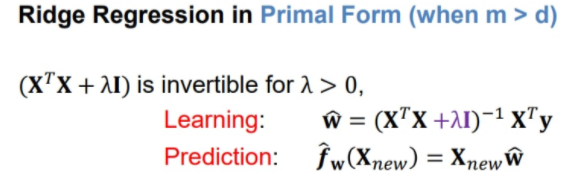

In [31]:
# iterate 20 times of data training and testing to find the prediction and average the accuracy
w_ridge = []
for i in range(0,20):
    # split the data for train/test(e.g 70/30)
    X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.3)
    
    # train the data
    P_1 = poly.fit_transform(X_train) 
    
    # create regression model
    reg1 = 0.0001*np.identity(P_1.shape[1])
    # make the dual ridge
    w_dual_ridge1 = (inv(P_1.T@P_1 + reg1)) @ P_1.T @ Y_train
    w_ridge
    #print(P_1.shape)
    # Feed the test data to the classifier
    P_test = poly.fit_transform(X_test)
    # generate the prediction result
    y_pred = P_test @ w_dual_ridge1
    
    # sort the prediction to either 1 or -1 to be compared for accuracy later
    y_pred_sorted = []

    for i in y_pred:
        if i < 0:
            y_pred_sorted.append(-1)

        else:
            y_pred_sorted.append(1)
            
    average_accuracy += accuracy_score(y_pred_sorted,Y_test)

In [32]:
# average the accuracy of 20 iterations
average_accuracy /= 20

In [33]:
# show the average accuracy
average_accuracy

0.9481835564053537

## This accuracy shows that the model can be utilized for predicting vibration occured. 

### The following codes are meant for 1 iteration of data training and testing prior to averaging process.  

In [8]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.3)

P_1 = poly.fit_transform(X_train) 

reg1 = 0.0001*np.identity(P_1.shape[1])
#w_dual_ridge1 = P_1.T @(inv(P_1@P_1.T + reg1)) @ Y_train
w_dual_ridge1 = (inv(P_1.T@P_1 + reg1)) @ P_1.T @ Y_train
print(P_1.shape)
P_test = poly.fit_transform(X_test)
y_pred = P_test @ w_dual_ridge1

y_pred_sorted = []

for i in y_pred:
    if i < 0:
        y_pred_sorted.append(-1)

    else:
        y_pred_sorted.append(1)

(2438, 351)


In [9]:
w_dual_file1 = pd.DataFrame(w_dual_ridge1)

In [10]:
w_dual_file1.to_excel('pred_experiment2.xlsx', sheet_name='vibe')

In [17]:
acc = accuracy_score(y_pred_sorted,Y_test)

In [18]:
acc

0.9493307839388145

### This section of code is meant for trying out different matrix samples

In [20]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.3)

P_1 = poly.fit_transform(X_train) 

reg1 = 0.0001*np.identity(P_1.shape[0])
w_dual_ridge1 = P_1.T @(inv(P_1@P_1.T + reg1)) @ Y_train
#w_dual_ridge1 = (inv(P_1.T@P_1 + reg1)) @ P_1.T @ Y_train
print(P_1.shape)
P_test = poly.fit_transform(X_test)
y_pred = P_test @ w_dual_ridge1

y_pred_sorted = []

for i in y_pred:
    if i < 0:
        y_pred_sorted.append(-1)

    else:
        y_pred_sorted.append(1)

(2438, 351)


In [21]:
acc = accuracy_score(y_pred_sorted,Y_test)

In [22]:
acc

0.5267686424474187